In [34]:
import glob
import pandas as pd

In [35]:
csvs = glob.glob('*/output.csv')
print(csvs)
df_results = [ pd.read_csv(csv) for csv in csvs ]
df_results = df_results[:2]

['AnalyticModel\\output.csv', 'NumericalModel\\output.csv', 'NumericalModelANIISO\\output.csv']


In [36]:
df_results[0]

,E [GPa],E pred [GPa],Name
0,13.201050,13.620581,TFP1-1
1,9.869501,9.721223,TFP2-1
2,9.222003,8.711639,TFP3-1
3,10.181815,8.778776,TFP4-1
4,6.143105,7.514863,TFP5-1
5,7.798060,8.068490,TFP6-1


In [37]:
df_results[1]

,Eb [GPa],Eb pred [GPa],Et [GPa],Et pred [GPa],Name
0,13.201050,12.094837,2.885509,8.118666,TFP1-1
1,9.869501,7.261885,2.258503,5.245106,TFP2-1
2,9.222003,6.438122,2.000437,4.819195,TFP3-1
3,10.181815,7.454643,2.451362,5.348214,TFP4-1
4,6.143105,5.660030,1.626582,4.964183,TFP5-1
5,7.798060,6.118602,1.739870,5.325541,TFP6-1


In [38]:
df_r = pd.DataFrame({
    "Name" : df_results[0]["Name"],
    "E [GPa]" : df_results[0]["E [GPa]"],
    "E pred Analytic [GPa]" : df_results[0]["E pred [GPa]"],
    "E pred Numeric [GPa]" : df_results[1]["Eb pred [GPa]"],
})

df_r

,Name,E [GPa],E pred Analytic [GPa],E pred Numeric [GPa]
0,TFP1-1,13.201050,13.620581,12.094837
1,TFP2-1,9.869501,9.721223,7.261885
2,TFP3-1,9.222003,8.711639,6.438122
3,TFP4-1,10.181815,8.778776,7.454643
4,TFP5-1,6.143105,7.514863,5.660030
5,TFP6-1,7.798060,8.068490,6.118602


In [39]:
df_r["E pred Analytic [GPa]"]/df_r["E pred Numeric [GPa]"]

0    1.126148
1    1.338664
2    1.353134
3    1.177625
4    1.327707
5    1.318682
dtype: float64

Text(0, 0.5, '$E_{flexión} [GPa]$')

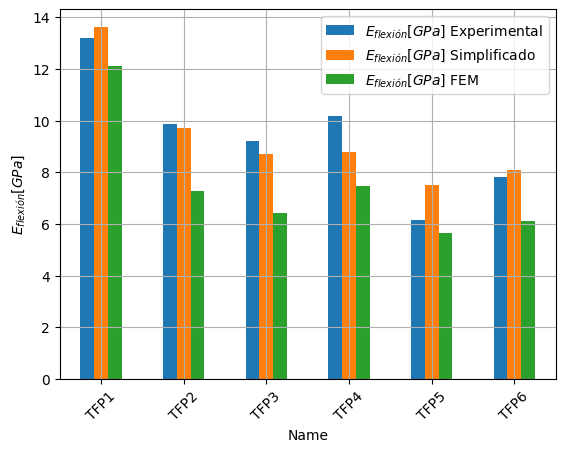

In [40]:
# bar plot of the results

import matplotlib.pyplot as plt

df_r.plot(x="Name", y=["E [GPa]", 
                       "E pred Analytic [GPa]", 
                       "E pred Numeric [GPa]"], kind="bar")
plt.legend([r"$E_{flexión} [GPa]$ Experimental",
            r"$E_{flexión} [GPa]$ Simplificado",
            r"$E_{flexión} [GPa]$ FEM "])
plt.grid( )
xticks = [ i for i in range(len(df_r["Name"])) ]
xtickslabels = [ f"{name[:-2]}" for name in df_r["Name"] ]
plt.xticks(xticks, xtickslabels,rotation=45)
plt.ylabel(r"$E_{flexión} [GPa]$")

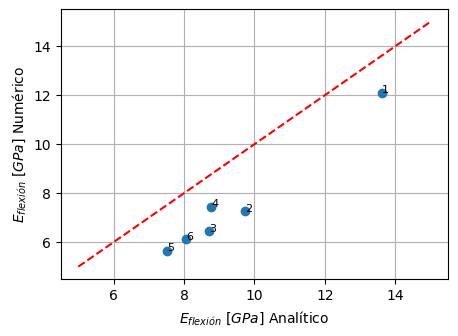

In [41]:
fig = plt.figure()
fig.set_size_inches(5,3.5)
plt.plot(df_r["E pred Analytic [GPa]"],
         df_r["E pred Numeric [GPa]"],'o')
plt.plot([5,15],[5,15],'r--')
plt.xlabel(r"$E_{flexión} \  [GPa]$ Analítico")
plt.ylabel(r"$E_{flexión} \  [GPa]$ Numérico")
# text name 
names = [ "1", "2", "3", "4", "5", "6"]
for i in range(len(df_r)):
    plt.text(df_r["E pred Analytic [GPa]"][i],
             df_r["E pred Numeric [GPa]"][i],
                names[i],   
                fontsize=8)
plt.grid()

AttributeError: module 'matplotlib.pyplot' has no attribute 'x'

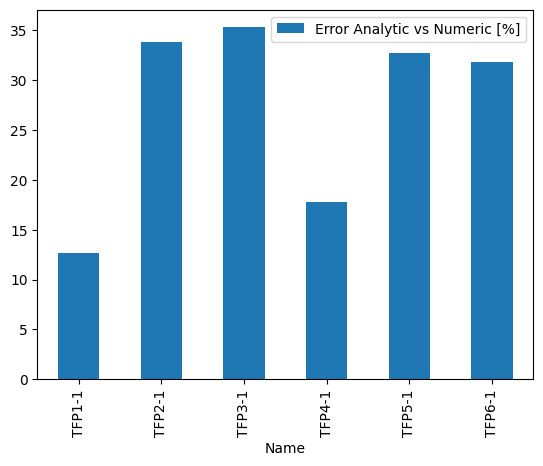

In [42]:
# error relative Analytic vs Numeric

df_r["Error Analytic vs Numeric [%]"] = 100 * abs(df_r["E pred Numeric [GPa]"] - df_r["E pred Analytic [GPa]"]) / df_r["E pred Numeric [GPa]"]
df_r["Error Analytic [%]"] = 100 * abs(df_r["E [GPa]"] - df_r["E pred Analytic [GPa]"]) / df_r["E [GPa]"]
df_r["Error Numeric [%]"] = 100 * abs(df_r["E [GPa]"] - df_r["E pred Numeric [GPa]"]) / df_r["E [GPa]"]
# error plot 
df_r.plot(x="Name", y="Error Analytic vs Numeric [%]", kind="bar")

# label 
plt.x(names)

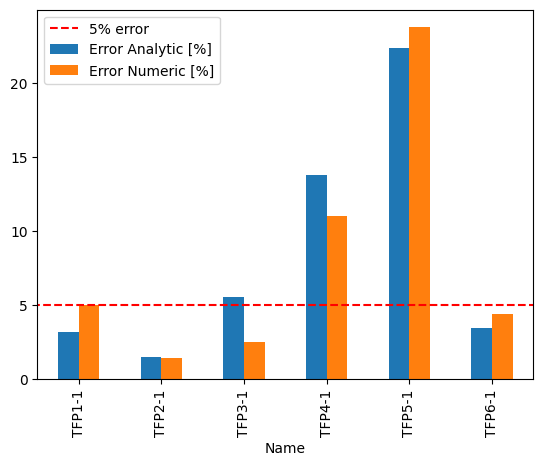

In [ ]:
df_r.plot(x="Name", y=["Error Analytic [%]", "Error Numeric [%]"], kind="bar")
# 5 % horizontal line
plt.hlines(5, -1, 10, colors='r', linestyles='dashed',label="5% error")
plt.legend()